# K nearest neighbors 

In [ ]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dataset_path = "/content/drive/My Drive/Colab Notebooks/IPRAD/Iris.csv"
# read in data
df = pd.read_csv(dataset_path)

In [ ]:
# preview dataset
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [ ]:
# split data into training and test sets; set random state to 0 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(df[['SepalLengthCm', 'SepalWidthCm', 
                                                        'PetalLengthCm', 'PetalWidthCm']],
                                                    df['Species'], random_state=0)

In [ ]:
# see how data has been split
print("X_train shape: {}\ny_train shape: {}".format(X_train.shape, y_train.shape))
print("X_test shape: {}\ny_test shape: {}".format(X_test.shape, y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test shape: (38, 4)
y_test shape: (38,)


**k-nearest neighbors**

based on the pair plots above, the clsses are clustered in a way that will be suitable for k-nearest neighbors

ref: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [ ]:
# initialize the Estimator object
knn = KNeighborsClassifier(n_neighbors=1)

In [ ]:
# fit the model to training set in order to predict classes
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [ ]:
# create a prediction array for our test set
y_pred = knn.predict(X_test)

In [ ]:
# based on the training dataset, our model predicts the following for the test set:
pd.concat([X_test, y_test, pd.Series(y_pred, name='Predicted', index=X_test.index)], 
          ignore_index=False, axis=1)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species,Predicted
114,5.8,2.8,5.1,2.4,Iris-virginica,Iris-virginica
62,6.0,2.2,4.0,1.0,Iris-versicolor,Iris-versicolor
33,5.5,4.2,1.4,0.2,Iris-setosa,Iris-setosa
107,7.3,2.9,6.3,1.8,Iris-virginica,Iris-virginica
7,5.0,3.4,1.5,0.2,Iris-setosa,Iris-setosa
100,6.3,3.3,6.0,2.5,Iris-virginica,Iris-virginica
40,5.0,3.5,1.3,0.3,Iris-setosa,Iris-setosa
86,6.7,3.1,4.7,1.5,Iris-versicolor,Iris-versicolor
76,6.8,2.8,4.8,1.4,Iris-versicolor,Iris-versicolor
71,6.1,2.8,4.0,1.3,Iris-versicolor,Iris-versicolor


In [ ]:
# what is our score?
print("Test set score: {:.2f}".format(knn.score(X_test, y_test)))


Test set score: 0.97


# K Means Clustering

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
X_new = X_train.iloc[:, :4]
X_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [ ]:
km = KMeans(n_clusters = 3, n_jobs = 4, random_state=21)
km.fit(X_new)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=4, precompute_distances='auto',
       random_state=21, tol=0.0001, verbose=0)

The following code prints the center points of the data

In [ ]:
centers = km.cluster_centers_
print(centers)

[[5.84390244 2.7097561  4.32926829 1.40731707]
 [4.9972973  3.38918919 1.45405405 0.23783784]
 [6.90588235 3.09705882 5.70294118 2.07058824]]


Now, let’s compare our original data versus our clustered results using the following code.

Text(0.5, 1.0, 'Predicted')

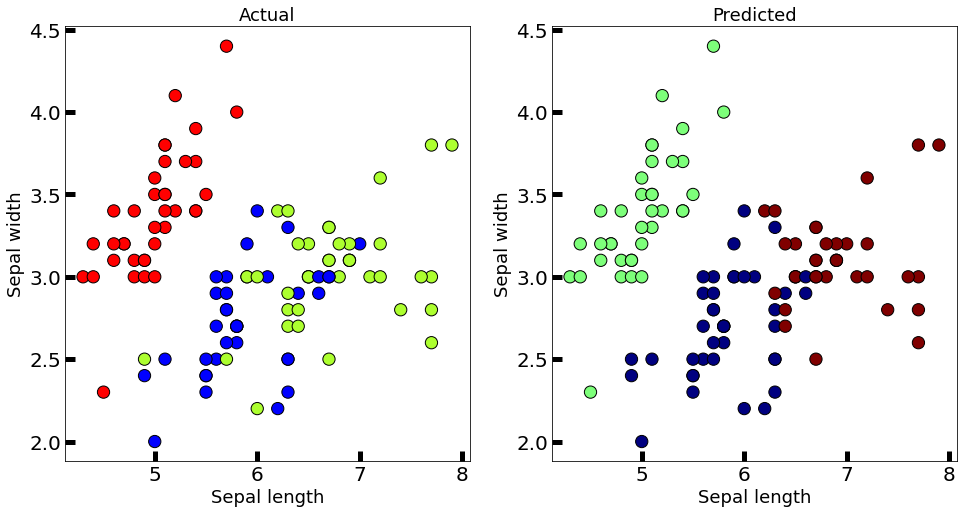

In [ ]:
# colors=['red','greenyellow','blue']
df_col = y_train.copy()
df_col.replace("Iris-setosa", "red",inplace=True)
df_col.replace("Iris-virginica", "greenyellow",inplace=True)
df_col.replace("Iris-versicolor", "blue",inplace=True)


#this will tell us to which cluster does the data observations belong.
new_labels = km.labels_
# Plot the identified clusters and compare with the answers
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(X_new.iloc[:, 0], X_new.iloc[:, 1], c=df_col.to_numpy(), cmap='gist_rainbow', edgecolor='k', s=150)
axes[1].scatter(X_new.iloc[:, 0], X_new.iloc[:, 1], c=new_labels, cmap='jet', edgecolor='k', s=150)
axes[0].set_xlabel('Sepal length', fontsize=18)
axes[0].set_ylabel('Sepal width', fontsize=18)
axes[1].set_xlabel('Sepal length', fontsize=18)
axes[1].set_ylabel('Sepal width', fontsize=18)
axes[0].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[1].tick_params(direction='in', length=10, width=5, colors='k', labelsize=20)
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('Predicted', fontsize=18)